In [147]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

In [148]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("joebeachcapital/phishing-urls")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'phishing-urls' dataset.
Path to dataset files: /kaggle/input/phishing-urls


In [149]:
!ls /root/.cache/kagglehub/datasets/joebeachcapital/phishing-urls/versions/1

urlset.csv


In [150]:
df = pd.read_csv(
    "/root/.cache/kagglehub/datasets/joebeachcapital/phishing-urls/versions/1/urlset.csv",
    encoding="latin-1",
    engine="python",
    on_bad_lines="skip"
)

In [151]:
df.shape

(95991, 14)

In [152]:
sum(1 for _ in open("/root/.cache/kagglehub/datasets/joebeachcapital/phishing-urls/versions/1/urlset.csv", encoding="latin-1"))

96029

In [153]:
df.head()

,domain,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,10000000,1.0,0.0,18.0,107.611111,107.277778,0.0,0.0,0.0,0.0,0.8,0.795729,1.0
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,10000000,0.0,0.0,11.0,150.636364,152.272727,0.0,0.0,0.0,0.0,0.0,0.768577,1.0
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,10000000,0.0,0.0,14.0,73.500000,72.642857,0.0,0.0,0.0,0.0,0.0,0.726582,1.0
3,mail.printakid.com/www.online.americanexpress....,10000000,0.0,0.0,6.0,562.000000,590.666667,0.0,0.0,0.0,0.0,0.0,0.85964,1.0
4,thewhiskeydregs.com/wp-content/themes/widescre...,10000000,0.0,0.0,8.0,29.000000,24.125000,0.0,0.0,0.0,0.0,0.0,0.748971,1.0


In [154]:
df.tail()

,domain,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
95986,xbox360.ign.com/objects/850/850402.html,339,1.0,1.0,2.0,142.5,141.000000,0.009009,0.009091,0.006536,0.006601,0.450980,0.846906,0.0
95987,games.teamxbox.com/xbox-360/1860/Dead-Space/,63029,1.0,0.0,3.0,114.0,128.333333,0.002899,0.002577,0.002907,0.002584,0.750000,0.714623,0.0
95988,www.gamespot.com/xbox360/action/deadspace/,753,1.0,1.0,3.0,91.0,101.333333,0.000000,0.003106,0.000000,0.000000,0.111111,0.648571,0.0
95989,en.wikipedia.org/wiki/Dead_Space_(video_game),6,1.0,1.0,4.0,682.0,744.250000,0.033075,0.029412,0.030250,0.029145,0.809735,0.840323,0.0
95990,www.angelfire.com/goth/devilmaycrytonite/,2547,1.0,1.0,5.0,32.4,27.200000,0.022222,0.032680,0.017341,0.020408,0.636364,0.674157,0.0


In [155]:
df.columns

Index(['domain', 'ranking', 'mld_res', 'mld.ps_res', 'card_rem', 'ratio_Rrem',
       'ratio_Arem', 'jaccard_RR', 'jaccard_RA', 'jaccard_AR', 'jaccard_AA',
       'jaccard_ARrd', 'jaccard_ARrem', 'label'],
      dtype='object')

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95991 entries, 0 to 95990
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   domain         95991 non-null  object 
 1   ranking        95945 non-null  object 
 2   mld_res        95929 non-null  object 
 3   mld.ps_res     95920 non-null  object 
 4   card_rem       95919 non-null  float64
 5   ratio_Rrem     95919 non-null  float64
 6   ratio_Arem     95919 non-null  float64
 7   jaccard_RR     95919 non-null  float64
 8   jaccard_RA     95918 non-null  float64
 9   jaccard_AR     95917 non-null  float64
 10  jaccard_AA     95916 non-null  float64
 11  jaccard_ARrd   95916 non-null  float64
 12  jaccard_ARrem  95914 non-null  object 
 13  label          95912 non-null  float64
dtypes: float64(9), object(5)
memory usage: 10.3+ MB


In [157]:
df['mld_res'].unique()

array(['1.0', '0.0', None, '0', '178', '9',
       "'Þ@\x85Þ\x17òÙl\x14dðR\x1e<jyG\x80`$ØÃhé\x0e-3\x93MÁ\x90\x9f³9\x8c?t?\x0f\x18ñX\x9aõ\x08scJúB\\\x0foÚÆ\x81VDñÔÑ§¿ÑÕ",
       "MJ¾#\x1b<M\x86·æèÈ§»¢º\x8dem\x03áï\x9e·Låï\xadµ=\x99\x12\x97:xÎ\x0büHÖÞÞ¸¼^§](6¼\x12 ö\x13OnÄM¤´G@at±Û \x9c×1È\x01v\x19ï¼´íMF~¿D\x03\x03%f³.\x92{\x10&\x8fÜXO\x1d\x81\x0b¼\x0fáº\x98$Éâ\xa0<zÄ²¯\x00ÈI±ÆáÐ\\Zo'\x9b\x81!?F#9?ì.\x1e5â±=ª\x10æF\x85ô\x84¹\x1fÏµ¬\x16¬\x8bã©\xa0O?\x82ª\x14¦2°á¾ØPü÷\x9a]5÷ð\x99KQ5¢ö",
       '\x94\x02ß1®\x05\x94à\x15Éªgãt¨Z\x18"©¬\x8f£Ý\x95Z\x05ãå\'ä\x04ûxÂË`\x17é\x90}ié\x98ý\x81\x83²\x89C\x1dÔ',
       '#Î´°Ë=\x91\x92\x7fPRºÉb.R²I\x8aDxÆ\x8b\x14"üª\x1c&ÚÚËÊ\x1aÎ\x9asöÊ\x07\x0fÖø\x9dm!âN6\x1e\x9fï\x967¤\x8fÅÙw£ÿ\x96û\xadJ6-\x9d\x9eêÊ\x9e\x00\x80\x8enÈ\x8d8ëx\x0eÂ¥ä\x1dz@|µýPK;ñÜPÏõë!ÈÍ\x7fÜ\x1cH^ÐX\x1a\x1b\x12\x8e»@pua\x0ftuR',
       'ºÁâÆ8\x98=HÚ\x1eBç\x83\x10\x04\x8c}ðæÎ\x8br&\x1eSæSÄPeøÌ+ÆR\\Cî\x1f%ÿ¼xä\x88µ\x8aUy\x16_@Ëy\x96Ñ.\x03ô®:V',
       'oI\x1f\x8b²ïGÿ-÷Z\x94l[;=Õ\x95<\x01\x0

In [158]:
df['mld.ps_res'].unique()

array(['0.0', '1.0', None, '0', '189', '7',
       '¾\x81\x96ó-¢\\\x07é\\t¬\x1al\x17¼\x96îìî×lNz\x994Ôïårâ\x97~\x7f\x8dZ¯îÂ-ê\x9bØç0\x9c\x1b8',
       '148.818182'], dtype=object)

In [159]:
df['ranking'].unique()

array(['10000000', '1', '602', ..., '325392', '87932', '591792'],
      dtype=object)

In [160]:
df['jaccard_ARrem'].unique()

array(['0.795729', '0.768577', '0.726582', ..., '0.752212', '0.785388',
       '0.714623'], dtype=object)

In [161]:
df['mld_res']=pd.to_numeric(df['mld_res'],errors='coerce')

In [162]:
df['mld_res'].dtype

dtype('float64')

In [163]:
df['mld.ps_res']=pd.to_numeric(df['mld.ps_res'],errors='coerce')

In [164]:
df['ranking']=pd.to_numeric(df['ranking'],errors='coerce')

In [165]:
df['jaccard_ARrem']=pd.to_numeric(df['jaccard_ARrem'],errors='coerce')

In [166]:
df.dtypes

,0
domain,object
ranking,float64
mld_res,float64
mld.ps_res,float64
card_rem,float64
ratio_Rrem,float64
ratio_Arem,float64
jaccard_RR,float64
jaccard_RA,float64
jaccard_AR,float64


In [167]:
df.duplicated().sum()

np.int64(1)

In [168]:
df.drop_duplicates(inplace=True)

In [169]:
df.duplicated().sum()

np.int64(0)

In [170]:
df.isna().sum()

,0
domain,0
ranking,72
mld_res,72
mld.ps_res,72
card_rem,72
ratio_Rrem,72
ratio_Arem,72
jaccard_RR,72
jaccard_RA,73
jaccard_AR,74


In [171]:
df = df.dropna(subset=['label'])

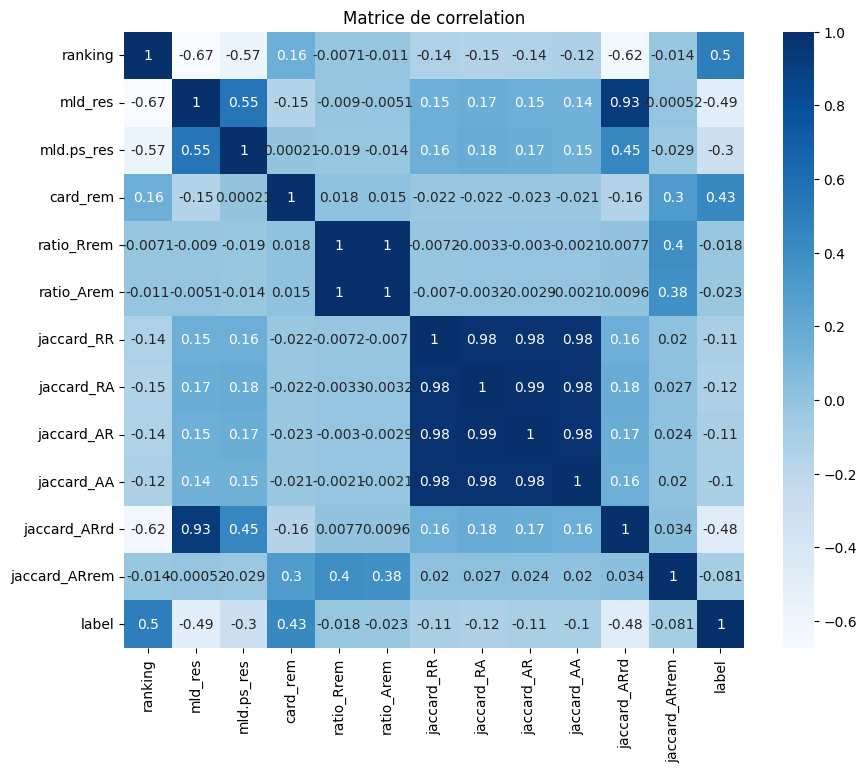

In [172]:
corr_matrix = df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(10,8))

sns.heatmap(corr_matrix,annot=True,cmap='Blues')

plt.title('Matrice de correlation')
plt.show()

In [173]:
df.drop(columns=['mld_res','ratio_Rrem','jaccard_RA','jaccard_RR','jaccard_AR','domain'],inplace=True)

In [174]:
df.shape

(95911, 8)

In [175]:
df.head()

,ranking,mld.ps_res,card_rem,ratio_Arem,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
0,10000000.0,0.0,18.0,107.277778,0.0,0.8,0.795729,1.0
1,10000000.0,0.0,11.0,152.272727,0.0,0.0,0.768577,1.0
2,10000000.0,0.0,14.0,72.642857,0.0,0.0,0.726582,1.0
3,10000000.0,0.0,6.0,590.666667,0.0,0.0,0.859640,1.0
4,10000000.0,0.0,8.0,24.125000,0.0,0.0,0.748971,1.0


Text(0.5, 1.0, 'Répartition des classes (phishing vs normal)')

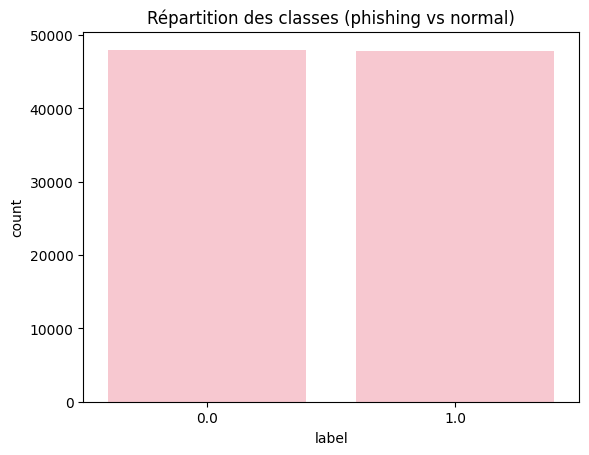

In [176]:
sns.countplot(x='label',data=df,color='pink')
plt.title("Répartition des classes (phishing vs normal)")

In [191]:
df['label'].value_counts()
df['label'].value_counts(normalize=True)

,proportion
label,
0.0,0.500558
1.0,0.499442


In [177]:
x=df.drop('label',axis=1)
y=df['label']

In [178]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [179]:
print("training data size",X_train.shape)
print("testing data size",X_test.shape)

training data size (76728, 7)
testing data size (19183, 7)


In [180]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

X_train=imputer.fit_transform(X_train)
X_test=imputer.transform(X_test)

In [181]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)

In [182]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

precision_rf = precision_score(y_test, y_pred_rf)
print(f"Random Forest Precision: {precision_rf}")

recall_rf = recall_score(y_test, y_pred_rf)
print(f"Random Forest Recall: {recall_rf}")

f1_rf = f1_score(y_test, y_pred_rf)
print(f"Random Forest F1 Score: {f1_rf}")

Random Forest Accuracy: 0.9465151436167439
Random Forest Precision: 0.9503442520342166
Random Forest Recall: 0.943064182194617
Random Forest F1 Score: 0.946690221344695


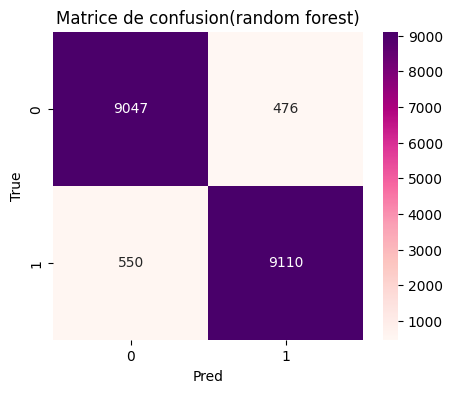

In [190]:
from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="RdPu")
plt.xlabel("Pred")
plt.ylabel("True")
plt.title("Matrice de confusion(random forest)")
plt.show()

In [187]:
#XGBoost
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier(n_estimators=300,learning_rate=0.05,max_depth=6,subsample=0.8,random_state=42,eval_metric='logloss')
xgb_classifier.fit(X_train, y_train)

y_pred_xgb = xgb_classifier.predict(X_test)

In [188]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb}")

precision_xgb = precision_score(y_test, y_pred_xgb)
print(f"XGBoost Precision : {precision_xgb}")

recall_xgb = recall_score(y_test, y_pred_xgb)
print(f"XGBoost Recall : {recall_xgb}")

f1_xgb = f1_score(y_test, y_pred_xgb)
print(f"XGBoost F1 Score : {f1_xgb}")

XGBoost Accuracy: 0.912213939425533
XGBoost Precision : 0.9185558354324097
XGBoost Recall : 0.9060041407867495
XGBoost F1 Score : 0.9122368146758391


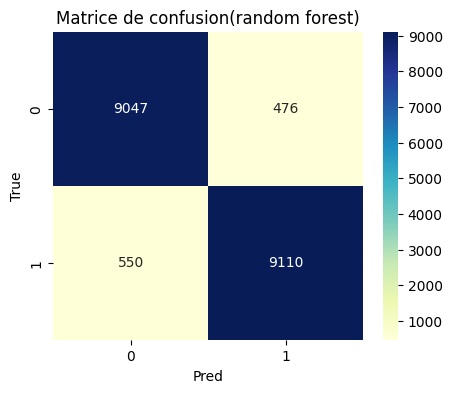

In [189]:
from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel("Pred")
plt.ylabel("True")
plt.title("Matrice de confusion(random forest)")
plt.show()